In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('athlete_events.csv')
region_df =  pd.read_csv('noc_regions.csv')

In [3]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [4]:
df.shape

(271116, 15)

In [5]:
df =df[df['Season']=='Summer']

In [6]:
df.shape

(222552, 15)

In [7]:
region_df.tail

<bound method NDFrame.tail of      NOC       region                 notes
0    AFG  Afghanistan                   NaN
1    AHO      Curacao  Netherlands Antilles
2    ALB      Albania                   NaN
3    ALG      Algeria                   NaN
4    AND      Andorra                   NaN
..   ...          ...                   ...
225  YEM        Yemen                   NaN
226  YMD        Yemen           South Yemen
227  YUG       Serbia            Yugoslavia
228  ZAM       Zambia                   NaN
229  ZIM     Zimbabwe                   NaN

[230 rows x 3 columns]>

In [8]:
df = df.merge(region_df , on ='NOC',how ='left')

In [9]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222551,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,Belarus,NaN


In [10]:
# total country participated
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [11]:
# checking the Missing value
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [12]:
# checking the duplicate value
df.duplicated().sum()

1385

In [13]:
#droping the duplicate value 
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [16]:
pd.get_dummies(df['Medal'],dtype=int)

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
222547,0,0,0
222548,0,0,0
222549,0,0,0
222550,0,0,0


In [17]:
df.shape

(221167, 17)

In [18]:
df = pd.concat([df,pd.get_dummies(df['Medal'],dtype=int)],axis=1)

In [19]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index().head(25)

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
5,FRA,463,567,587
6,HUN,432,328,363
7,SWE,354,396,358
8,AUS,342,452,510
9,GDR,339,277,227


In [20]:
df[(df['NOC'] == 'IND') &(df['Medal']=='Gold')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
4186,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4190,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4460,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4461,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4462,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191759,117232,Dung Dung Sylvanus,M,31.0,160.0,62.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193964,118553,Carlyle Carrol Tapsell,M,23.0,182.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193965,118553,Carlyle Carrol Tapsell,M,27.0,182.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
205949,125560,"Max ""Maxie"" Vaz",M,NaN,NaN,NaN,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0


In [21]:
#Counting only one medal 
Medal_tally = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [22]:
Medal_tally

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222528,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia,NaN,0,0,1
222530,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,NaN,1,0,0
222536,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 100 metres Butterfly,NaN,Poland,NaN,0,0,0
222537,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 200 metres Butterfly,NaN,Poland,NaN,0,0,0


In [23]:
Medal_tally= Medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [24]:
#India medal count
Medal_tally[Medal_tally['NOC']=='IND']

,NOC,Gold,Silver,Bronze
53,IND,9,7,12


In [25]:
Medal_tally

,NOC,Gold,Silver,Bronze
0,USA,1035,802,708
1,URS,394,317,294
2,GBR,278,317,300
3,GER,235,261,283
4,FRA,234,256,287
...,...,...,...,...
225,AHO,0,1,0
226,LBR,0,0,0
227,LCA,0,0,0
228,LES,0,0,0


In [26]:
Medal_tally['total'] = Medal_tally['Gold'] + Medal_tally['Silver'] + Medal_tally['Bronze']

In [27]:
Medal_tally

,NOC,Gold,Silver,Bronze,total
0,USA,1035,802,708,2545
1,URS,394,317,294,1005
2,GBR,278,317,300,895
3,GER,235,261,283,779
4,FRA,234,256,287,777
...,...,...,...,...,...
225,AHO,0,1,0,1
226,LBR,0,0,0,0
227,LCA,0,0,0,0
228,LES,0,0,0,0


In [28]:
years = df['Year'].unique().tolist()

years.sort()

In [29]:
years.insert(0,'Overall')

In [30]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [31]:
country = np.unique(df['region'].dropna().values).tolist()

In [32]:
country.sort()

In [33]:
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [34]:
country.insert(0,'Overall')

In [35]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [36]:
Medal_tally

,NOC,Gold,Silver,Bronze,total
0,USA,1035,802,708,2545
1,URS,394,317,294,1005
2,GBR,278,317,300,895
3,GER,235,261,283,779
4,FRA,234,256,287,777
...,...,...,...,...,...
225,AHO,0,1,0,1
226,LBR,0,0,0,0
227,LCA,0,0,0,0
228,LES,0,0,0,0


In [37]:
def fetch_medal_tally(df,years,country):
    medal_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
    flag = 0
    if years == 'Overall' and country == 'Overall':
        temp_df = medal_df
    if years =='Overall' and country != 'Overall':
        flag =1
        temp_df = medal_df[medal_df['region'] == country]
    if years !='Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == 2016]
    if years !='Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == 2016) & (medal_df['region']== country)]
    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year',ascending=True).reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']

    print(x)


In [38]:
fetch_medal_tally(df,years='Overall', country='Overall')

            region  Gold  Silver  Bronze  total
0              USA  1035     802     708   2545
1           Russia   592     498     487   1577
2          Germany   444     457     491   1392
3               UK   278     317     300    895
4           France   234     256     287    777
..             ...   ...     ...     ...    ...
200        Lesotho     0       0       0      0
201        Albania     0       0       0      0
202          Libya     0       0       0      0
203  Liechtenstein     0       0       0      0
204        Liberia     0       0       0      0

[205 rows x 5 columns]


In [39]:
fetch_medal_tally(df,years='Overall', country='India')

    Year  Gold  Silver  Bronze  total
0   1900     0       2       0      2
1   1920     0       0       0      0
2   1924     0       0       0      0
3   1928     1       0       0      1
4   1932     1       0       0      1
5   1936     1       0       0      1
6   1948     1       0       0      1
7   1952     1       0       1      2
8   1956     1       0       0      1
9   1960     0       1       0      1
10  1964     1       0       0      1
11  1968     0       0       1      1
12  1972     0       0       1      1
13  1976     0       0       0      0
14  1980     1       0       0      1
15  1984     0       0       0      0
16  1988     0       0       0      0
17  1992     0       0       0      0
18  1996     0       0       1      1
19  2000     0       0       1      1
20  2004     0       1       0      1
21  2008     1       0       2      3
22  2012     0       2       4      6
23  2016     0       1       1      2


In [40]:
fetch_medal_tally(df,years='2016', country='India')

  region  Gold  Silver  Bronze  total
0  India     0       1       1      2


In [41]:
fetch_medal_tally(df,years='2016', country='USA')

  region  Gold  Silver  Bronze  total
0    USA    46      37      38    121


In [42]:
fetch_medal_tally(df,years='2016', country='Overall')

         region  Gold  Silver  Bronze  total
0           USA    46      37      38    121
1            UK    27      23      17     67
2         China    26      18      26     70
3        Russia    19      17      20     56
4       Germany    17      10      15     42
..          ...   ...     ...     ...    ...
198     Ireland     0       2       0      2
199      Israel     0       0       2      2
200    Kiribati     0       0       0      0
201  Kyrgyzstan     0       0       0      0
202    Zimbabwe     0       0       0      0

[203 rows x 5 columns]


In [43]:
medal_df =  df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [44]:
medal_df[(medal_df['Year'] == 2016) & (medal_df['region']== 'India')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
1015,663,Sharath Kamal Achanta,M,34.0,186.0,85.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Table Tennis,Table Tennis Men's Singles,NaN,India,NaN,0,0,0
7065,4523,Seema Antil,F,33.0,182.0,92.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Discus Throw,NaN,India,NaN,0,0,0
8713,5562,Aditi Ashok,F,18.0,173.0,57.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Golf,Golf Women's Individual,NaN,India,NaN,0,0,0
9202,5868,Manu Attri,M,23.0,172.0,73.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Men's Doubles,NaN,India,NaN,0,0,0
10070,6427,Lalita Shivaji Babar,F,27.0,166.0,50.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Women's 3,000 metres Steeplechase",NaN,India,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182260,111467,Sathish Kumar Sivalingam,M,24.0,175.0,77.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Men's Middleweight,NaN,India,NaN,0,0,0
195568,119515,Shiva Thapa,M,22.0,169.0,56.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Bantamweight,NaN,India,NaN,0,0,0
198042,120871,Sandeep Tomar,M,25.0,168.0,61.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,India,NaN,0,0,0
216942,132143,Vikas Krishan Yadav,M,24.0,177.0,69.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Middleweight,NaN,India,NaN,0,0,0


In [45]:
df['Year'].unique().shape[0]-1

28

In [46]:
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0


In [47]:
# How many city Held Olympics
city_held_olyampic = df['City'].unique()
print(len(city_held_olyampic))
city_held_olyampic

23


array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [48]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [49]:
df['Event'].unique().shape

(651,)

In [50]:
df['Name'].unique().shape

(116122,)

In [51]:
df['region'].unique().shape

(206,)

In [52]:

nation_over_time= df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')
nation_over_time

,Year,count
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
24,1912,29
23,1920,29
21,1924,45
20,1928,46
19,1932,47


In [53]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [54]:
nation_over_time.rename(columns={'Year':'Edition','count': 'No of countries'},inplace= True)
nation_over_time

,Edition,No of countries
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
24,1912,29
23,1920,29
21,1924,45
20,1928,46
19,1932,47


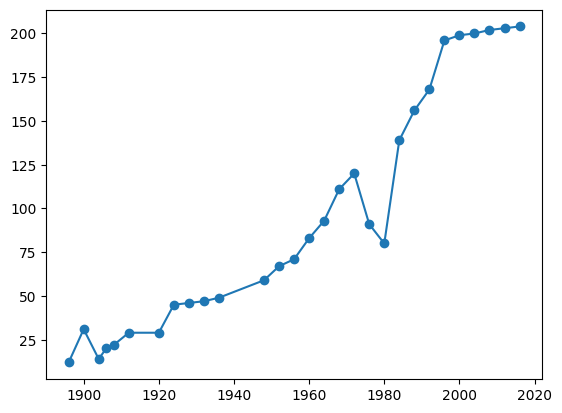

In [55]:
import matplotlib.pyplot as plt

plt.plot(nation_over_time['Edition'], nation_over_time['No of countries'], marker='o')



plt.show()


In [56]:
df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index()


,Year,count
0,2016,306
1,2008,302
2,2012,302
3,2004,301
4,2000,300
5,1996,271
6,1992,257
7,1988,237
8,1984,221
9,1980,203


In [57]:
df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index()


,Year,count
0,2016,306
1,2008,302
2,2012,302
3,2004,301
4,2000,300
5,1996,271
6,1992,257
7,1988,237
8,1984,221
9,1980,203


In [58]:
x = df.drop_duplicates(['Year','Sport','Event'])

In [59]:
x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc ='count').fillna(0).astype('int')

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
Sport,,,,,,,,,,,,,,,,,,,,,
Aeronautics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alpinism,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Archery,0,8,6,0,3,0,10,0,0,0,...,2,2,4,4,4,4,4,4,4,4
Art Competitions,0,0,0,0,0,5,5,5,13,13,...,0,0,0,0,0,0,0,0,0,0
Athletics,12,23,24,21,26,30,29,27,27,29,...,38,41,42,43,44,46,46,47,47,47
Badminton,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,5,5,5,5,5,5
Baseball,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,0
Basketball,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Basque Pelota,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='Year', ylabel='Sport'>

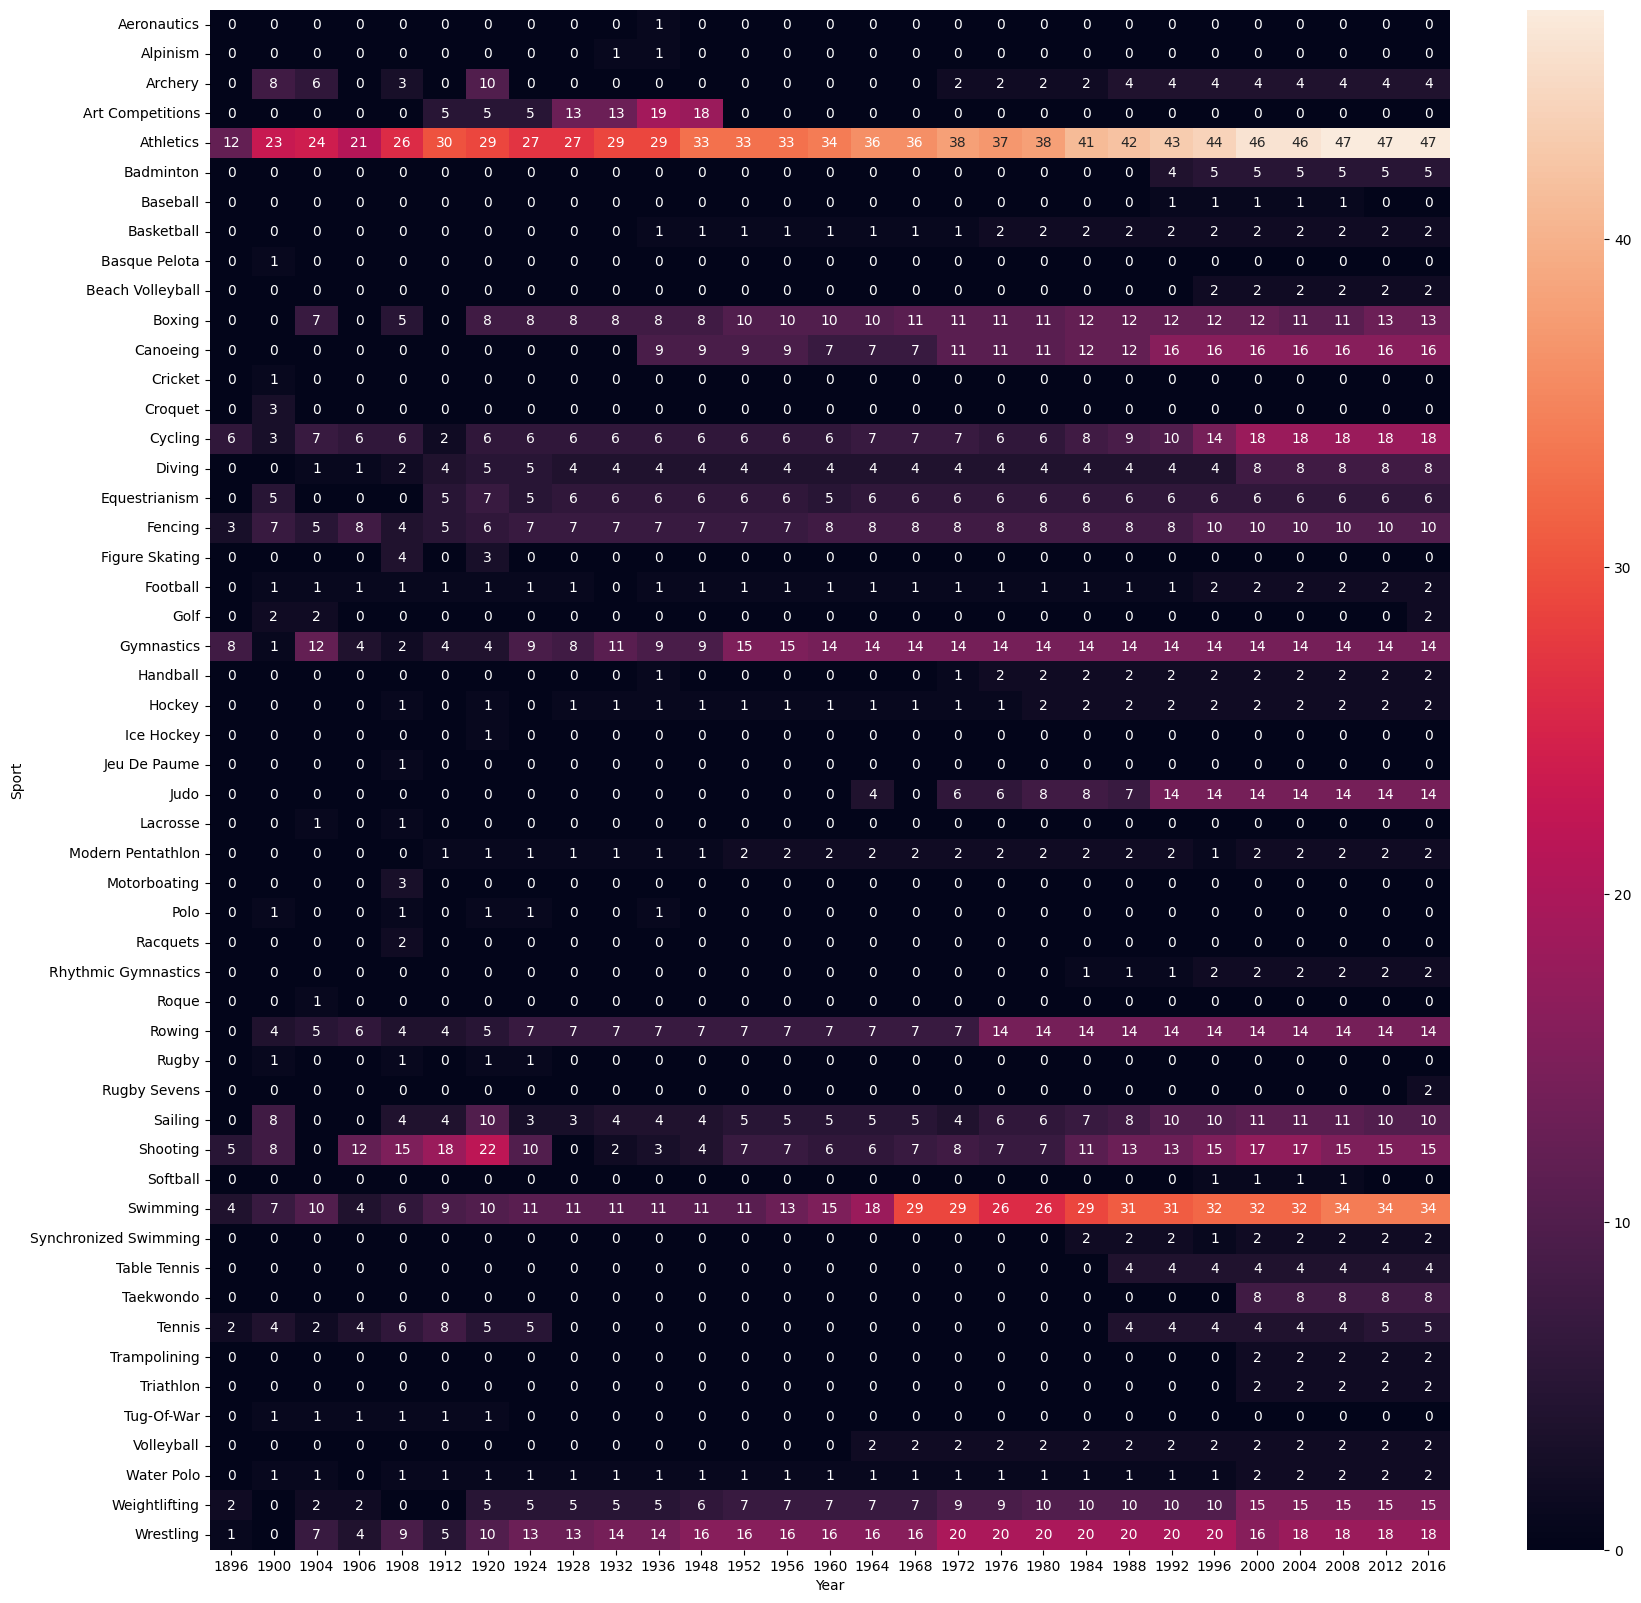

In [60]:
import seaborn as sns
plt.figure(figsize = (20,20))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc ='count').fillna(0).astype('int'),annot=True)

In [61]:
df['Year']

0         1992
1         2012
2         1920
3         1900
4         1932
          ... 
222547    2004
222548    1972
222549    2000
222550    2004
222551    2016
Name: Year, Length: 221167, dtype: int64

In [62]:
# Most Medal Athelete
def most_successful(df,sport):
    temp_df = df.dropna(subset=['Medal'])
    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]
    x =  temp_df['Name'].value_counts().reset_index().head(15).merge(df, on='Name', how='left')[['Name','count','Sport','region']].drop_duplicates('Name')
    x.rename(columns={'count':'Medals'},inplace =True)
    return x

In [63]:
most_successful(df,'Gymnastics')

,Name,Medals,Sport,region
0,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
19,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
43,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
67,Takashi Ono,13,Gymnastics,Japan
100,Sawao Kato,12,Gymnastics,Japan
124,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
145,Viktor Ivanovych Chukarin,11,Gymnastics,Russia
161,Vra slavsk (-Odloilov),11,Gymnastics,Czech Republic
179,gnes Keleti-Srkny (Klein),10,Gymnastics,Hungary
193,Vitaly Venediktovich Shcherbo,10,Gymnastics,Russia


## Country wise Analysis

In [64]:
# country medal tally per year (line plot)
#rempocing NaN value in medal
temp_df = df.dropna(subset =['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace =True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3760\1774946256.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace =True)


In [65]:
temp_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
12,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN,1,0,0
13,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN,1,0,0
15,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN,1,0,0
16,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222486,135521,Anton Zwerina,M,23.0,NaN,66.0,Austria,AUT,1924 Summer,1924,Summer,Paris,Weightlifting,Weightlifting Men's Lightweight,Silver,Austria,NaN,0,0,1
222508,135535,Claudia Antoinette Zwiers,F,22.0,181.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Judo,Judo Women's Middleweight,Bronze,Netherlands,NaN,1,0,0
222526,135553,Galina Ivanovna Zybina (-Fyodorova),F,21.0,168.0,80.0,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Women's Shot Put,Gold,Russia,NaN,0,1,0
222528,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia,NaN,0,0,1


In [66]:
new_df = temp_df[temp_df['region']=='India']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

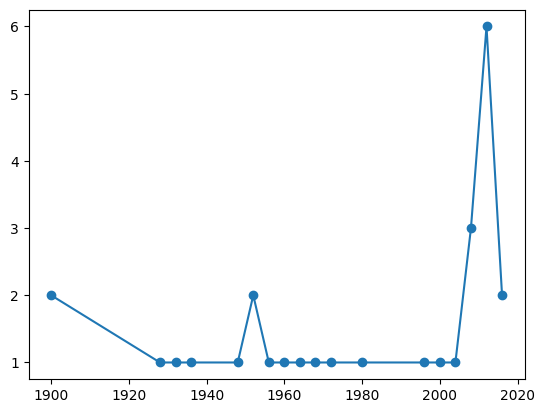

In [67]:
plt.plot(final_df['Year'], final_df['Medal'], marker='o')
plt.show()

<Axes: xlabel='Year', ylabel='Sport'>

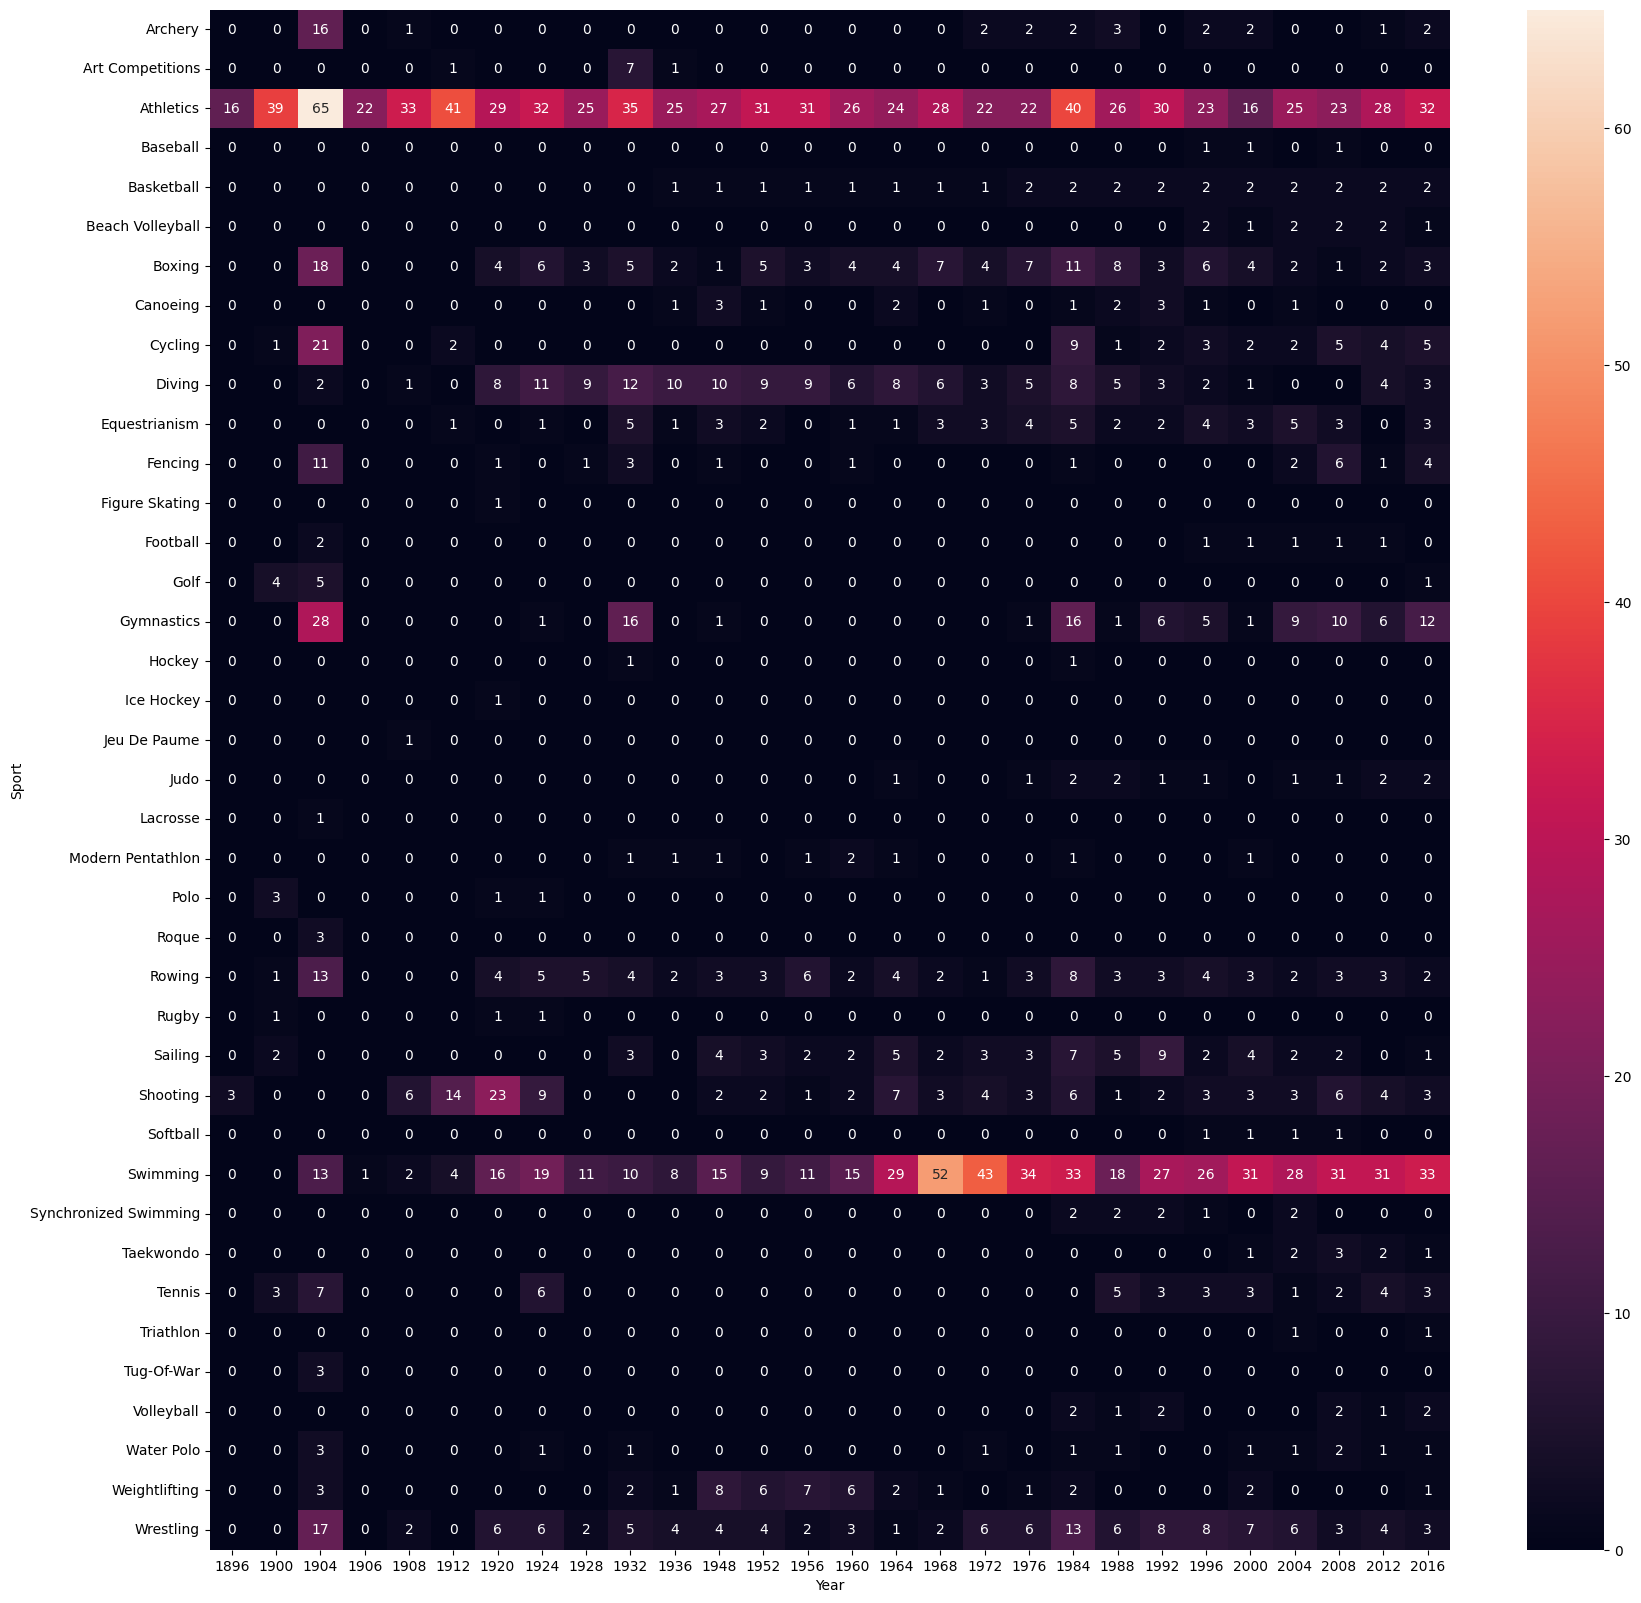

In [68]:
new_df = temp_df[temp_df['region']=='USA']
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index= 'Sport',columns ='Year', values ='Medal',aggfunc='count').fillna(0),annot=True)

In [69]:
#Top 10 Athelete of the Country 
def most_successful(df,country):
    temp_df = df.dropna(subset=['Medal'])
    
    temp_df = temp_df[temp_df['region'] == country]
    x =  temp_df['Name'].value_counts().reset_index().head(15).merge(df, on='Name', how='left')[['Name','count','Sport']].drop_duplicates('Name')
    x.rename(columns={'count':'Medals'},inplace =True)
    return x

In [70]:
most_successful(df,'India')


,Name,Medals,Sport
0,Udham Singh Kular,4,Hockey
4,Leslie Walter Claudius,4,Hockey
8,Shankar Pillay Laxman,3,Hockey
11,Ranganathan Francis,3,Hockey
14,Richard James Allen,3,Hockey
17,Balbir Singh,3,Hockey
20,Harbinder Singh Chimni,3,Hockey
23,"Balbir Singh Dosanjh, Sr.",3,Hockey
26,"Victor John ""V. J."" Peter",3,Hockey
29,Dhyan Chand Bais,3,Hockey


In [71]:
import plotly.figure_factory as ff
import plotly.offline as pyo
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [72]:
athlete_df =df.drop_duplicates(subset =['Name','region'])

In [73]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal']=='Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal']=='Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal']=='Bronze']['Age'].dropna()



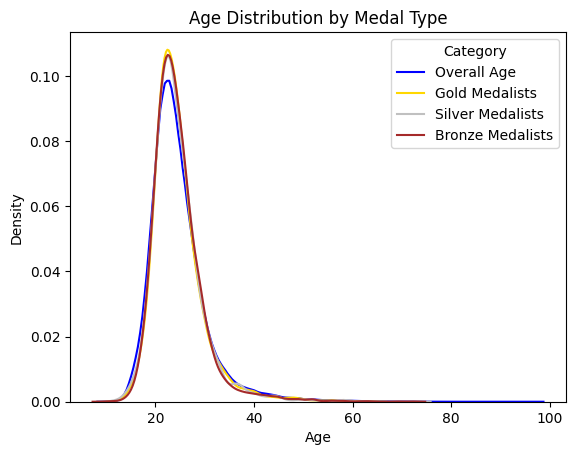

In [74]:
# Prepare the data
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()

# Plot using sns.kdeplot
ax = sns.kdeplot(data=x1, label='Overall Age', color='blue')
sns.kdeplot(data=x2, label='Gold Medalists', color='gold')
sns.kdeplot(data=x3, label='Silver Medalists', color='silver')
sns.kdeplot(data=x4, label='Bronze Medalists', color='brown')

# Set plot labels and titles
ax.set(title='Age Distribution by Medal Type', xlabel='Age', ylabel='Density')
plt.legend(title='Category')
plt.show()

[<Axes: xlabel='Age', ylabel='Count'>,
 <Axes: xlabel='Age', ylabel='Count'>,
 <Axes: xlabel='Age', ylabel='Count'>,
 <Axes: xlabel='Age', ylabel='Count'>]

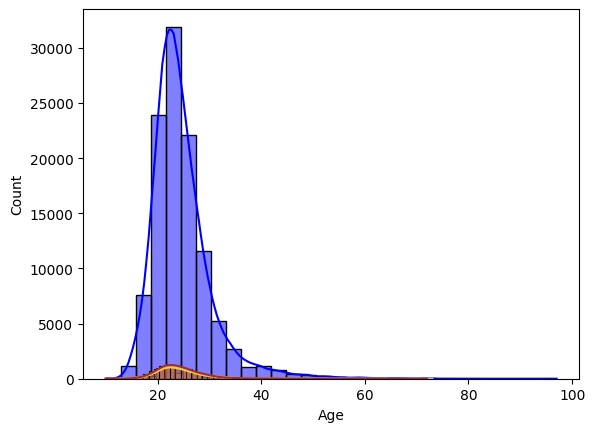

In [75]:
# ax = sns.distplot([x1,x2,x3,x4],kde =True, bins=30, color='blue')
# ax.set(title=['Overall Age','Gold Medalist', 'Silver Medalist', "Bronze Medalist"], xlabel='Age', ylabel='Density')
[sns.histplot(data=x, kde=True, bins=30, label=lbl, color=col) for x, lbl, col in zip([x1, x2, x3, x4], ['Overall Age', 'Gold Medalists', 'Silver Medalists', 'Bronze Medalists'], ['blue', 'gold', 'silver', 'brown'])]







In [76]:
df['Sport'].drop_duplicates().value_counts()

Sport
Basketball               1
Judo                     1
Archery                  1
Volleyball               1
Synchronized Swimming    1
Table Tennis             1
Baseball                 1
Rhythmic Gymnastics      1
Rugby Sevens             1
Trampolining             1
Beach Volleyball         1
Triathlon                1
Rugby                    1
Lacrosse                 1
Polo                     1
Cricket                  1
Ice Hockey               1
Racquets                 1
Motorboating             1
Croquet                  1
Figure Skating           1
Jeu De Paume             1
Roque                    1
Basque Pelota            1
Alpinism                 1
Softball                 1
Golf                     1
Modern Pentathlon        1
Wrestling                1
Football                 1
Tug-Of-War               1
Athletics                1
Swimming                 1
Badminton                1
Sailing                  1
Gymnastics               1
Art Competitions      

In [77]:
famous_sports =['Basketball',
 'Judo',
 'Football',
 'Tug-Of-War',
 'Athletics',
 'Swimming',
 'Badminton',
 'Sailing',
 'Gymnastics',
 'Art Competitions',
 'Handball',
 'Weightlifting',
 'Wrestling',
 'Water Polo',
 'Hockey',
 'Rowing',
 'Fencing',
 'Volleyball',
 'Equestrianism',
 'Shooting',
 'Boxing',
 'Taekwondo',
 'Cycling',
 'Diving',
 'Canoeing',
 'Table Tennis',
 'Baseball',
 'Rubgy Sevens',
 'Beach Volleyball',
 'Ice Hockey',
 'Tennis',
 'Jeu De Paume',
 'Roque',
 'Basque Pelota',
 'Alpinism',
 'Aeronautics']

In [78]:
x = []
name = []
for sport in famous_sports:
    temp_df = athlete_df[athlete_df['Sport'] == sport]
    x.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())
    name.append(sport)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3760\3230237569.py:3: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3760\3230237569.py:3: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3760\3230237569.py:3: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3760\3230237569.py:3: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



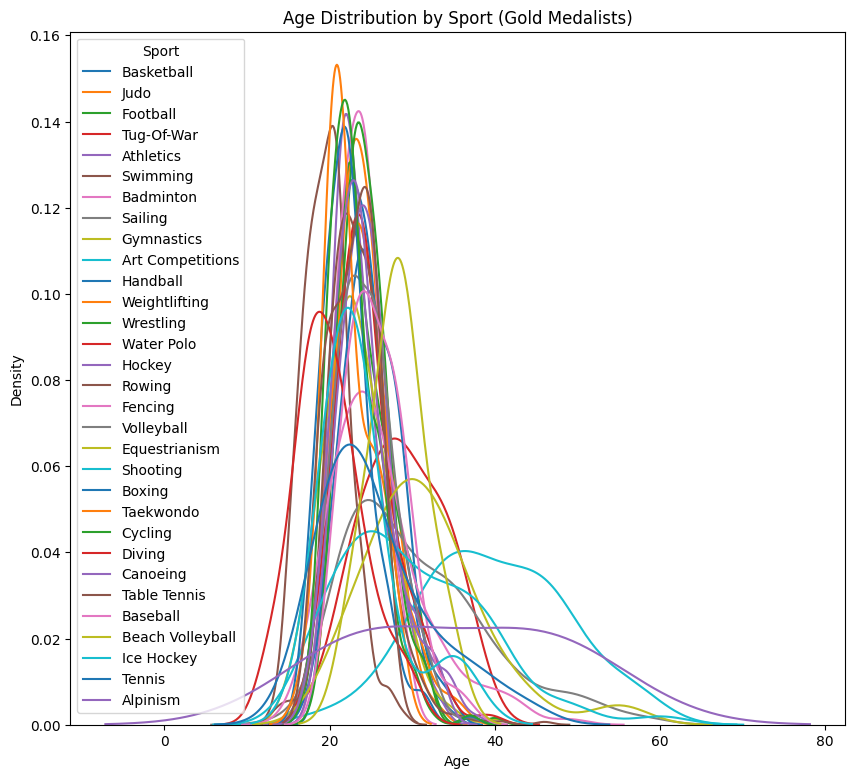

In [79]:
fig, ax = plt.subplots(figsize =(10,9))
for idx, ages in enumerate(x):
    sns.kdeplot(data=ages, label=name[idx], ax=ax)

# Set plot labels and titles
ax.set(title='Age Distribution by Sport (Gold Medalists)', xlabel='Age', ylabel='Density')
ax.legend(title='Sport')


In [80]:
athlete_df['Medal'].fillna('No Medal', inplace = True)

<Axes: xlabel='Weight', ylabel='Height'>

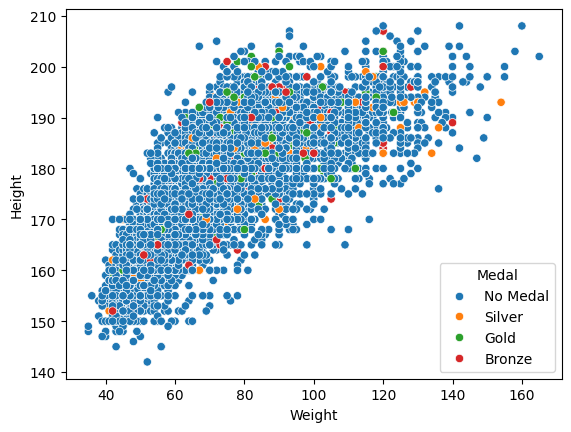

In [86]:

temp_df = athlete_df[athlete_df['Sport'] == 'Athletics']
sns.scatterplot(data=temp_df, x='Weight', y='Height', hue='Medal')

In [87]:
# Women Participation

men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

In [88]:
men

,Year,Name
0,1896,174
1,1900,1181
2,1904,629
3,1906,759
4,1908,1772
5,1912,1978
6,1920,2280
7,1924,2535
8,1928,2342
9,1932,1382


In [89]:
women

,Year,Name
0,1900,23
1,1904,6
2,1906,6
3,1908,44
4,1912,53
5,1920,73
6,1924,132
7,1928,285
8,1932,162
9,1936,316


In [100]:
final = men.merge(women,on = 'Year',how ='left')
final.rename(columns={'Name_x': 'Male', 'Name_y':'Female'},inplace=True) 

In [103]:
final.fillna(0,inplace=True)

<Axes: xlabel='Year', ylabel='Count'>

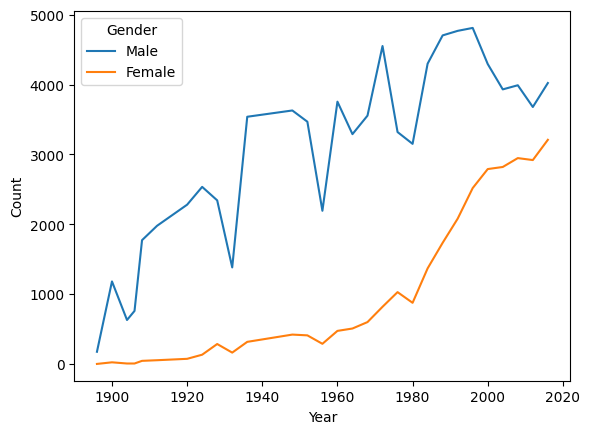

In [104]:
final_melted = pd.melt(final, id_vars='Year', value_vars=['Male', 'Female'],var_name='Gender',value_name='Count')
sns.lineplot(data=final_melted, x='Year', y='Count',hue='Gender')
